## **Titanic - Machine Learning from Disaster**

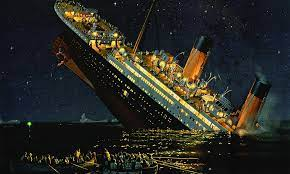

**The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster.**

Prediction of survival on the Titanic

In [181]:
import os    #it interacts with the underlying operating system.
import numpy as np   #for linear algebra and mathematical calculation.
import pandas as pd   #for data manipulation and analysis
import matplotlib.pyplot as plt  #for plotting
%matplotlib inline
import seaborn as sns   #this is also for plotting the dataset.
plt.style.use("ggplot")   #the style to use in plotting
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:.3f}'.format)    #importing the libraries for analyisis

In [182]:
#pip install missingno   #this is for visualizing missing values in the dataset.

In [183]:
#pip install matplotlib==3.4.2   #install this version of matplotlib for plotting the graphs.

In [184]:
import matplotlib
matplotlib.__version__   #checking the version

'3.4.2'

In [185]:
os.getcwd()     #getting the current working directory

'/content'

In [186]:
import zipfile   #this is for extracting the data

In [187]:
def FileExtraction():
    with zipfile.ZipFile('/content/titanic.zip') as file:
        print(file.infolist())
        print('\n')
        print(file.namelist())
        print('\n')
        print(file.extractall())
if __name__ =='__main__':FileExtraction()   #Extracting the zipfile

[<ZipInfo filename='gender_submission.csv' compress_type=deflate file_size=3258 compress_size=872>, <ZipInfo filename='test.csv' compress_type=deflate file_size=28629 compress_size=11171>, <ZipInfo filename='train.csv' compress_type=deflate file_size=61194 compress_size=22388>]


['gender_submission.csv', 'test.csv', 'train.csv']


None


In [188]:
train_dataset = pd.read_csv('train.csv') #reading the train dataset
test_data=pd.read_csv("test.csv")  #reading the test dataset

In [189]:
train_dataset.head() # displays the first five rows of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [190]:
train_dataset.tail()  #displays the last five rows of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000,0,0,370376,7.750,NaN,Q


In [191]:
test_data.head()    #the first five rows of the test dataset.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S


In [192]:
train_dataset.shape  #the shape of the dataset, the train dataset and the test dataset.

(891, 12)

In [193]:
train_dataset.dtypes.value_counts()  #it returns the number of occurances of each datatype in the dataset.

int64      5
object     5
float64    2
dtype: int64

In [194]:
train_dataset.columns   #it displays the columns in the dataset.

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [195]:
train_dataset.nunique()   #the number of unique values per column in the entire dataset

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [196]:
train_dataset.info()  #it provides information about the dataset. This information includes the Non-missing values
                       #per column, the columns datatype and the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [197]:
train_dataset.describe().style.background_gradient(cmap='twilight_r')   #A summary of descriptive statistics about the dataset. This summary only uses numeric dataset.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [198]:
train_dataset.isnull().sum()  #the sum of missing values per column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

TEST DATA

In [199]:
 test_data.shape  #the shape of the test daaset

(418, 11)

In [200]:
test_data.columns   #the columns in the test data.

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [201]:
test_data.dtypes.value_counts()    #the data types in the dataset.

object     5
int64      4
float64    2
dtype: int64

In [202]:
test_data.size    #the size of the data.

4598

In [203]:
test_data.nunique()    #the number of unique values per column in the dataset.

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [204]:
test_data.info()   #provides information about the test dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [205]:
test_data.isnull().sum()   #the sum of missing values per column in the dataset

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# DATA PREPROCESSING and DATA CLEANING

Setting the PassengerID as the index

In [206]:
train_dataset.set_index('PassengerId',inplace=True)
train_dataset.index.name=None   #index to have no name

In [207]:
train_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [208]:
test_data.set_index('PassengerId', inplace=True)
test_data.index.name=None #the index of the data to have no index name

In [209]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S


Summary Statistics per survival categort

In [210]:
train_dataset[train_dataset['Survived']==0].describe()   #statistics of the dataset where the Surived =0

,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000,549.000,424.000,549.000,549.000,549.000
mean,0.000,2.532,30.626,0.554,0.330,22.118
std,0.000,0.736,14.172,1.288,0.823,31.388
min,0.000,1.000,1.000,0.000,0.000,0.000
25%,0.000,2.000,21.000,0.000,0.000,7.854
50%,0.000,3.000,28.000,0.000,0.000,10.500
75%,0.000,3.000,39.000,1.000,0.000,26.000
max,0.000,3.000,74.000,8.000,6.000,263.000


In [211]:
train_dataset[train_dataset['Survived']==1].describe().style.set_properties(backgroundcolor='black',color='white') 

,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.000000,290.000000,342.000000,342.000000,342.000000
mean,1.000000,1.950292,28.343690,0.473684,0.464912,48.395408
std,0.000000,0.863321,14.950952,0.708688,0.771712,66.596998
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,19.000000,0.000000,0.000000,12.475000
50%,1.000000,2.000000,28.000000,0.000000,0.000000,26.000000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,57.000000
max,1.000000,3.000000,80.000000,4.000000,5.000000,512.329200


Checking and Dropping Duplicates in the dataset

In [212]:
train_dataset.duplicated().sum()   #sum of duplicates in the training dataset.

0

In [213]:
train_dataset.drop_duplicates(inplace=True)  #dropping missing values in the training dataset

In [214]:
test_data.duplicated().sum() #sum of duplicates in the test dataset.

0

In [215]:
test_data.drop_duplicates(inplace=True)   #dropping duplicates in the test dataset

Creating columns for analysis

In [216]:
train_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


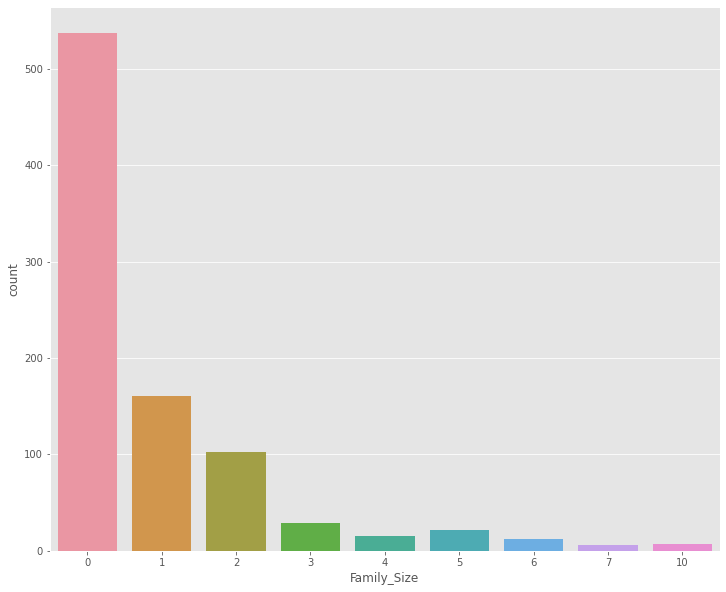

In [217]:
train_dataset['Family_Size'] = train_dataset['SibSp'] + train_dataset['Parch']
plt.figure(figsize=(12,10))
sns.countplot(data=train_dataset,x='Family_Size')
plt.show()

The Correlation among the variables

In [218]:
corr_matrix=train_dataset.corr()
corr_matrix   #the standard correlation coefficient.

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size
Survived,1.000,-0.338,-0.077,-0.035,0.082,0.257,0.017
Pclass,-0.338,1.000,-0.369,0.083,0.018,-0.549,0.066
Age,-0.077,-0.369,1.000,-0.308,-0.189,0.096,-0.302
SibSp,-0.035,0.083,-0.308,1.000,0.415,0.160,0.891
Parch,0.082,0.018,-0.189,0.415,1.000,0.216,0.783
Fare,0.257,-0.549,0.096,0.160,0.216,1.000,0.217
Family_Size,0.017,0.066,-0.302,0.891,0.783,0.217,1.000


In [219]:
corr_matrix['Survived'].sort_values(ascending=False)   #how the features relates with the target variable

Survived       1.000
Fare           0.257
Parch          0.082
Family_Size    0.017
SibSp         -0.035
Age           -0.077
Pclass        -0.338
Name: Survived, dtype: float64

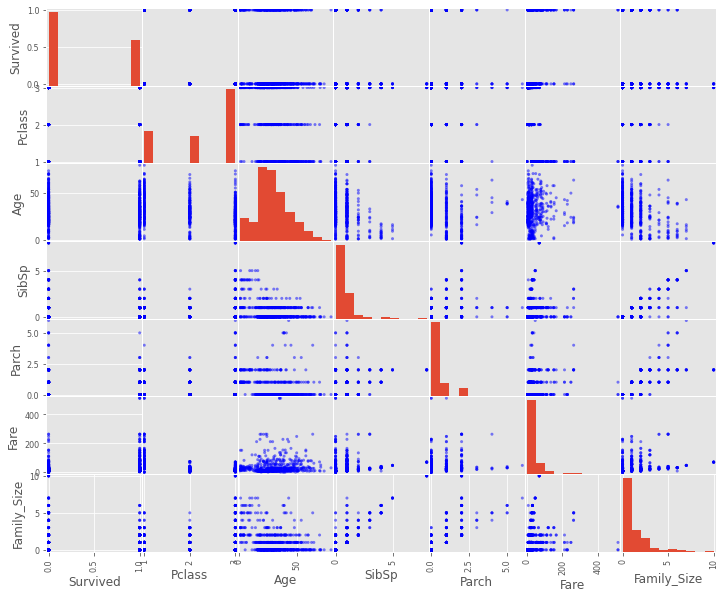

In [220]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_dataset, figsize=(12,10),color='blue')  #graph of how each features relates to each other
plt.show()

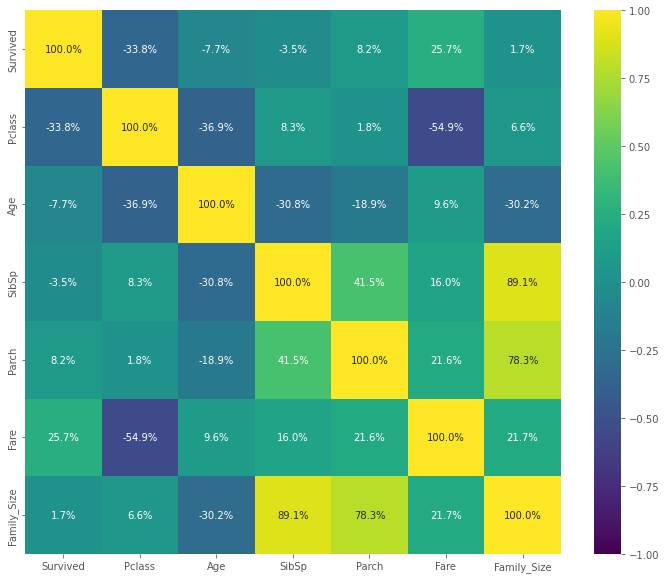

In [221]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True,vmin=-1,vmax=1,fmt='0.1%',cmap='viridis')   #visual of the correlation in % form
plt.show()

Checking and working with OUTLIERS

In [222]:

iqr_factor = [1.5, 2]
list1, list2 = [], []

for factor in iqr_factor:
    counts = 0
    print(f'Outliers for {factor} IQR :')
    for col in train_dataset.select_dtypes(['int64', 'float64']):

      IQR = train_dataset[col].quantile(0.75) - train_dataset[col].quantile(0.25)
      lower_lim = train_dataset[col].quantile(0.25) - factor*IQR
      upper_lim = train_dataset[col].quantile(0.75) + factor*IQR

      cond = train_dataset[(train_dataset[col] < lower_lim) | (train_dataset[col] > upper_lim)].shape[0]
      if cond > 0 and factor == 1.5:
        list1.append(train_dataset[(train_dataset[col] < lower_lim) | (train_dataset[col] > upper_lim)].index.tolist())
      elif cond > 0 and factor == 2:
        list2.append(train_dataset[(train_dataset[col] < lower_lim) | (train_dataset[col] > upper_lim)].index.tolist())

      if cond > 0: print(f'{col:<30} : ', cond); counts += cond
print(f'\n TOTAL OUTLIERS FOR {factor} IQR : {counts}')
print('')


Outliers for 1.5 IQR :
Age                            :  11
SibSp                          :  46
Parch                          :  213
Fare                           :  116
Family_Size                    :  91
Outliers for 2 IQR :
Age                            :  2
SibSp                          :  30
Parch                          :  213
Fare                           :  92
Family_Size                    :  62

 TOTAL OUTLIERS FOR 2 IQR : 399



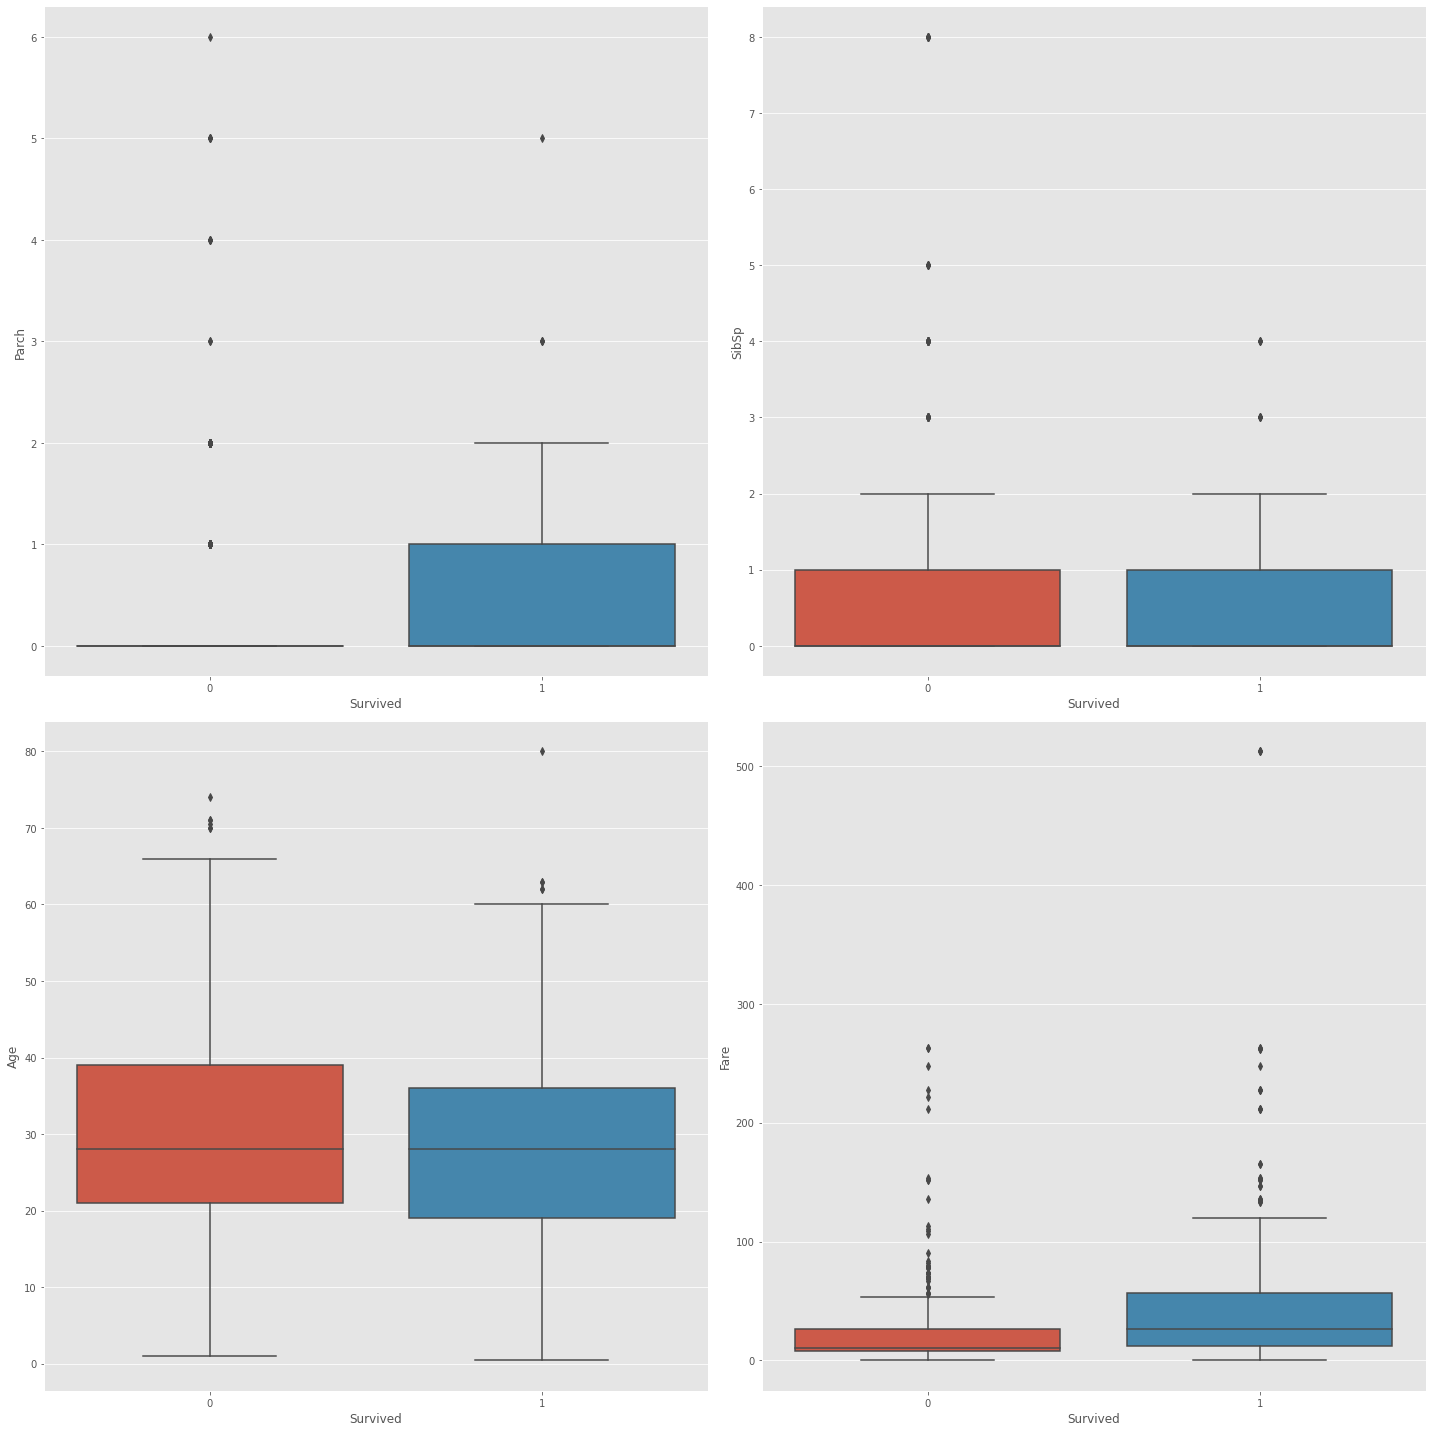

(None, None)

In [223]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
sns.boxplot(data=train_dataset,x='Survived',y='Parch',ax=ax[0,0])
sns.boxplot(data=train_dataset,x='Survived',y='SibSp',ax=ax[0,1])
sns.boxplot(data=train_dataset,x='Survived',y='Age',ax=ax[1,0])
sns.boxplot(data=train_dataset,x='Survived',y='Fare',ax=ax[1,1])
plt.tight_layout(), plt.show()    #VISUALIZING THE OUTLIERS


In [224]:
mean = np.mean(train_dataset)


<AxesSubplot:>

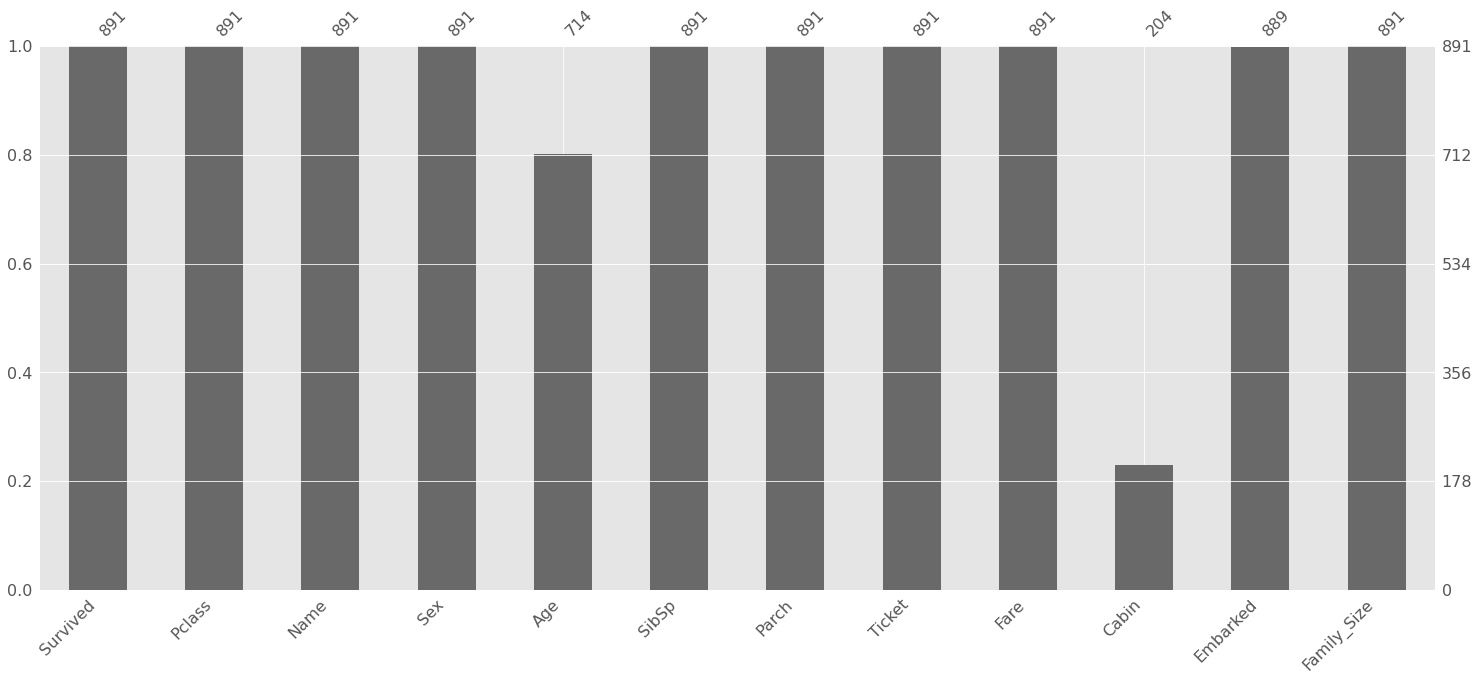

In [225]:
import missingno as msno
msno.bar(train_dataset)  #visualizing the missing columns in the dataset

In [226]:
train_dataset.isnull().sum()   #missing values in the training dataset.

Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_Size      0
dtype: int64

Embarked point of the passengers ('Cherbourg':'C',       'Queenstown':'Q',     'Southampton':'S')

In [227]:
train_dataset[train_dataset['Embarked'].isna()]     #the rows where the Embarked column is missing values.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
62,1,1,"Icard, Miss. Amelie",female,38.000,0,0,113572,80.000,B28,NaN,0
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000,0,0,113572,80.000,B28,NaN,0


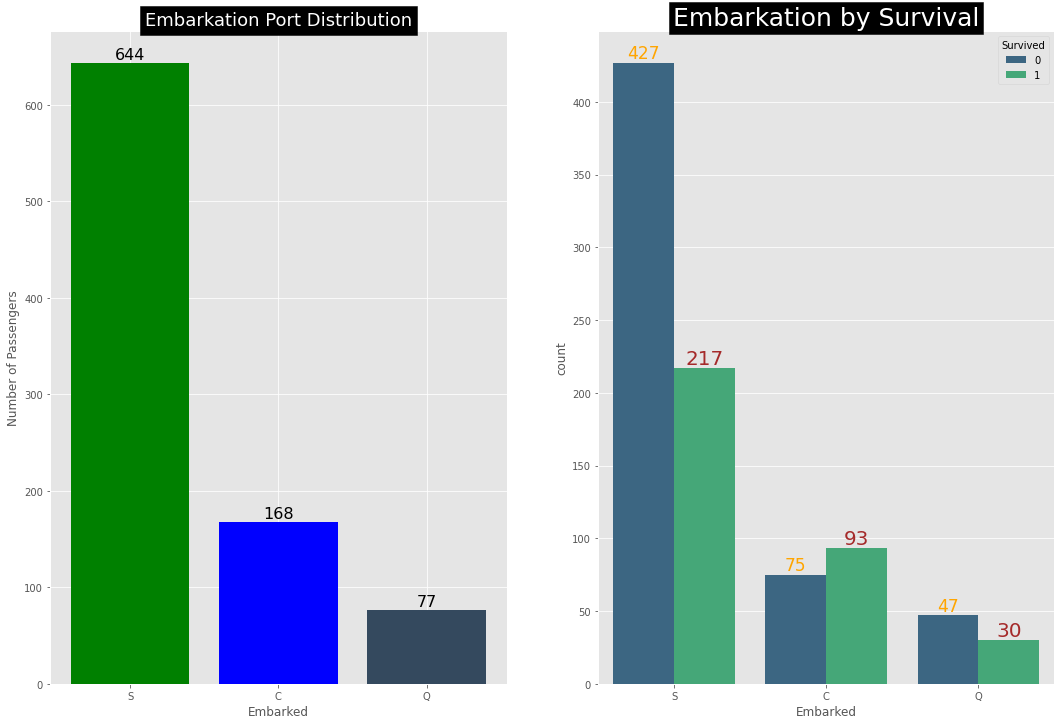

In [228]:
plt.figure(figsize=(18,12))
color=['green','blue','#34495E']

plt.subplot(1,2,1)
ax2 = plt.bar(train_dataset['Embarked'].value_counts().index,train_dataset['Embarked'].value_counts().values,label='Embarked',color=color)
plt.bar_label(ax2,size=16)
plt.xlabel('Embarked'),plt.ylabel('Number of Passengers'), plt.xticks([0,1,2])
plt.title('Embarkation Port Distribution',color='white',backgroundcolor='k',size=18)

plt.subplot(1,2,2)
plot1=sns.countplot(data=train_dataset,x='Embarked',hue='Survived',palette='viridis')
plot1.bar_label(plot1.containers[0],color='orange',size=17), plot1.bar_label(plot1.containers[1],color='brown',size=20)

plt.title('Embarkation by Survival',fontfamily='Times New Roman',size=25,color='white',backgroundcolor='k')
plt.show()

In [229]:
 #Filling Embarked column missing values with the mode (Most occurances)
print("Before filling the missing values:\n",train_dataset['Embarked'].value_counts(dropna=False))
print('\n')
train_dataset['Embarked'].fillna(value=train_dataset['Embarked'].mode()[0],inplace=True)
print("After filling the missing values:\n",train_dataset['Embarked'].value_counts())

Before filling the missing values:
 S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


After filling the missing values:
 S    646
C    168
Q     77
Name: Embarked, dtype: int64


Fare of the passengers

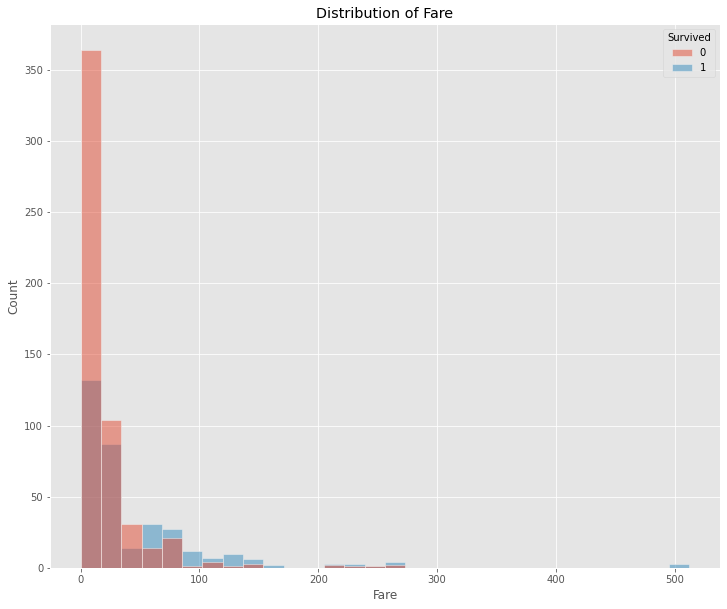

In [230]:
plt.figure(figsize=(12,10))
plt.title("Distribution of Fare")
sns.histplot(data=train_dataset,x="Fare",hue="Survived",bins=30)
plt.show()

In [231]:
train_dataset.groupby('Survived')['Fare'].describe()  #statistics of Fare attribute grouped by survived

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.000,22.118,31.388,0.000,7.854,10.500,26.000,263.000
1,342.000,48.395,66.597,0.000,12.475,26.000,57.000,512.329


In [232]:
test_data[test_data['Fare'].isna()]   #the missing Fare value in the test data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1044,3,"Storey, Mr. Thomas",male,60.500,0,0,3701,NaN,NaN,S


In [233]:
df=test_data[(test_data['Pclass']==3) & (test_data['Embarked']=='S')]   #Filtering the data so as to impute the missing value
df.describe()    #summary statistics about the data

,Pclass,Age,SibSp,Parch,Fare
count,142.000,109.000,142.000,142.000,141.000
mean,3.000,24.051,0.549,0.556,13.913
std,0.000,11.000,1.275,1.392,12.745
min,3.000,0.170,0.000,0.000,3.171
25%,3.000,19.000,0.000,0.000,7.854
50%,3.000,24.000,0.000,0.000,8.050
75%,3.000,29.000,1.000,0.000,14.500
max,3.000,60.500,8.000,9.000,69.550


In [234]:
median=df.describe()['Fare']['50%']    #calculating the median of the data
test_data['Fare'].fillna(value=median,inplace=True)   #filling the missing values

Ticket of the passengers

In [235]:
train_dataset['Ticket'].value_counts()  #Tickets are unique as each passenger has its own ticket thus the tickets must be unique

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [236]:
non_unque_tickets=train_dataset['Ticket'].value_counts()[train_dataset['Ticket'].value_counts().values>1]
non_unque_tickets.index   #the tickets that are not unique

Index(['347082', 'CA. 2343', '1601', '3101295', 'CA 2144', '347088',
       'S.O.C. 14879', '382652', 'LINE', 'PC 17757',
       ...
       '19943', '3101278', '250649', '29750', '364516', '248738', '12749',
       '19996', 'S.C./PARIS 2079', '349237'],
      dtype='object', length=134)

In [237]:
unique_tickets=train_dataset['Ticket'].value_counts()[train_dataset['Ticket'].value_counts().values==1]
unique_tickets.index     #the tickets that are unique.

Index(['STON/O 2. 3101273', '349224', 'A./5. 3235', '14973', 'SC/AH 29037',
       '219533', 'A/5 3902', '364848', '349214', '36963',
       ...
       '347470', '349243', '250651', 'A/5 2466', '226593', '9234', '19988',
       '2693', 'PC 17612', '370376'],
      dtype='object', length=547)

In [238]:
train_dataset['Ticket'].value_counts()[train_dataset['Ticket'].value_counts().values>1]

347082             7
CA. 2343           7
1601               7
3101295            6
CA 2144            6
                  ..
248738             2
12749              2
19996              2
S.C./PARIS 2079    2
349237             2
Name: Ticket, Length: 134, dtype: int64

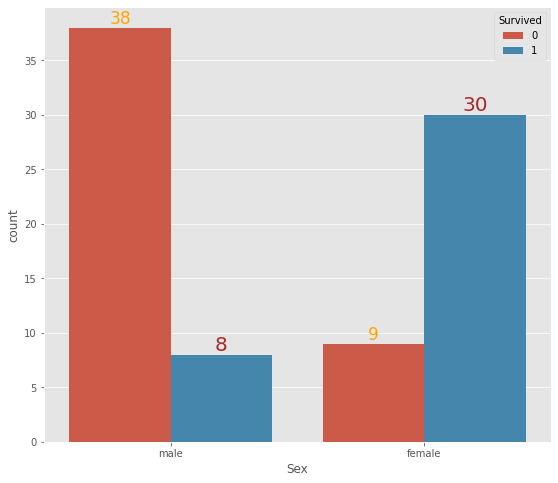

In [239]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
ax9=sns.countplot(data=train_dataset[(train_dataset['Family_Size']>0) &(train_dataset['Ticket'].isin(unique_tickets.index))],
              x='Sex',hue='Survived')
ax9.bar_label(ax9.containers[0],color='orange',size=17), ax9.bar_label(ax9.containers[1],color='brown',size=20)
plt.show()


In [240]:
train_dataset['Ticket'] = train_dataset['Ticket'].apply(lambda x: 'own' if x in unique_tickets else 'collective')
test_data['Ticket'] = test_data['Ticket'].apply(lambda x: 'own' if x in unique_tickets else 'collective')

Age column

In [241]:
train_dataset['Age'].isnull().sum(), test_data['Age'].isnull().sum()  #missing values for both train and test dataset

(177, 86)

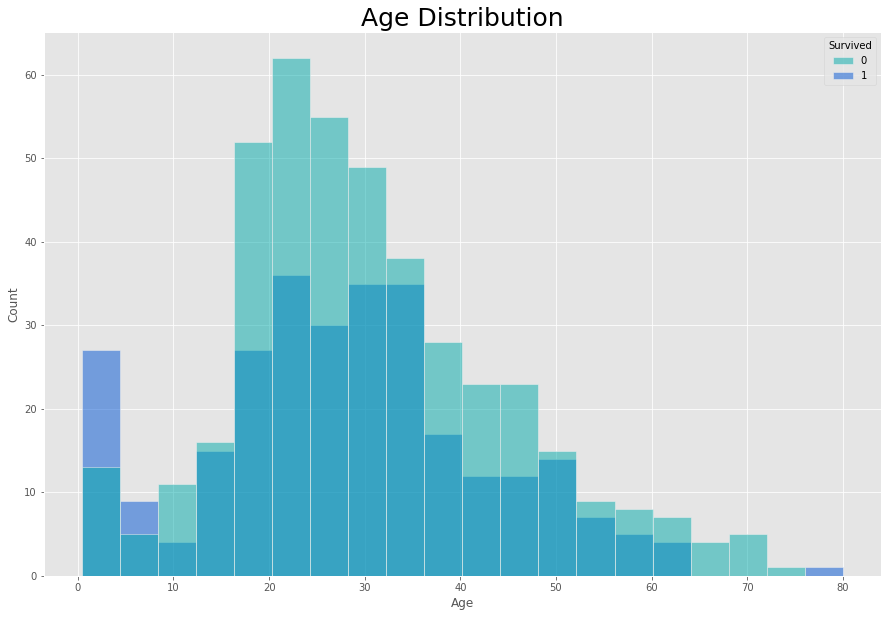

In [242]:
plt.figure(figsize=(15,10))
sns.histplot(data=train_dataset,x='Age',hue='Survived',palette='winter_r')
plt.title("Age Distribution",fontfamily="Times New Roman",size=25)
plt.show()

In [243]:
train_dataset[train_dataset['Age'].isna()].head()   #returns the data where the Age column is missing

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
6,0,3,"Moran, Mr. James",male,NaN,0,0,own,8.458,NaN,Q,0
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,own,13.000,NaN,S,0
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,own,7.225,NaN,C,0
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,own,7.225,NaN,C,0
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,own,7.879,NaN,Q,0


In [244]:
train_dataset[train_dataset['Age'].isna()][['SibSp','Parch']].describe()

,SibSp,Parch
count,177.000,177.000
mean,0.565,0.181
std,1.626,0.534
min,0.000,0.000
25%,0.000,0.000
50%,0.000,0.000
75%,0.000,0.000
max,8.000,2.000


In [245]:
#filtering the data and grouping the filtered the data based on the SibSp and Parch
train_dataset[train_dataset['Age'].isna()].groupby(['SibSp','Parch'])['Age'].value_counts(dropna=False)

SibSp  Parch  Age
0      0      NaN    133
       1      NaN      1
       2      NaN      3
1      0      NaN     21
       1      NaN      3
       2      NaN      2
2      0      NaN      3
3      1      NaN      4
8      2      NaN      7
Name: Age, dtype: int64

In [246]:
data_group=train_dataset.groupby(['SibSp','Parch','Pclass'])['Age'].mean()
data_group

SibSp  Parch  Pclass
0      0      1        41.006
              2        33.737
              3        28.236
       1      1        37.167
              2        26.875
              3        18.947
       2      1        25.778
              2        16.041
              3        20.611
       3      3        24.000
       4      3        29.000
       5      3        40.000
1      0      1        37.200
              2        31.712
              3        24.919
       1      1        47.417
              2        21.525
              3        21.000
       2      1        17.846
              2        24.500
              3        13.500
       3      2        54.000
              3        32.000
       4      1        64.000
              3        42.500
       5      3        38.667
       6      3        43.000
2      0      1        49.000
              2        25.667
              3        27.143
       1      2        13.000
              3         2.167
       2      1    

In [247]:
#filling the missing values with the mean of the dataset according to the data group it belongs to
train_dataset['Age'].fillna(value=train_dataset.groupby(['SibSp','Parch','Pclass'])['Age'].transform('mean'),inplace=True) 

In [248]:
#the only missing values in our age dataset
mean=train_dataset['Age'].describe()['mean']
train_dataset['Age'].fillna(value=mean,inplace=True)

In [249]:
train_dataset['Age'].isnull().sum()  #no mising values in the training dataset.

0

Working with missing values in the Age column of test dataset

In [250]:
test_data['Age'].value_counts(dropna=False)    #missing values in the test dataset

NaN       86
24.000    17
21.000    17
22.000    16
30.000    15
          ..
76.000     1
28.500     1
22.500     1
62.000     1
38.500     1
Name: Age, Length: 80, dtype: int64

In [251]:
#filtering the data and grouping the missing data based on the SibSp and Parch features
test_data[test_data['Age'].isna()].groupby(['SibSp','Parch'])['Age'].value_counts(dropna=False)

SibSp  Parch  Age
0      0      NaN    67
       2      NaN     1
       4      NaN     1
1      0      NaN     7
       1      NaN     2
       2      NaN     2
       9      NaN     2
2      0      NaN     3
8      2      NaN     1
Name: Age, dtype: int64

In [252]:
test_data.groupby(['SibSp','Parch','Pclass'])['Age'].mean()

SibSp  Parch  Pclass
0      0      1        39.429
              2        29.337
              3        26.121
       1      1        35.875
              2        32.000
              3        16.457
       2      1        35.000
              2        29.000
              3        25.055
       3      2        36.000
       4      3           NaN
1      0      1        41.385
              2        34.188
              3        30.773
       1      1        49.091
              2        21.429
              3         9.558
       2      1        28.500
              2        18.730
              3        16.585
       3      1        54.500
       4      1        60.000
       5      3        40.000
       6      3        40.000
       9      3           NaN
2      0      1        57.000
              2        23.000
              3        20.000
       1      2        16.000
       2      1        13.000
              3        18.000
3      0      3        31.000
       1      3    

In [253]:
test_data['Age'].fillna(value=test_data.groupby(['SibSp','Parch','Pclass'])['Age'].transform('mean'),inplace=True)

In [254]:
#filling other missing values
mean=test_data['Age'].describe()['mean']
test_data['Age'].fillna(value=mean,inplace=True)

In [255]:
test_data['Age'].isnull().sum()

0

Drop the columns

In [256]:
train_dataset.drop(['Cabin','Name'],axis=1,inplace=True)    #outlier columns

Sex / Gender of the passengers

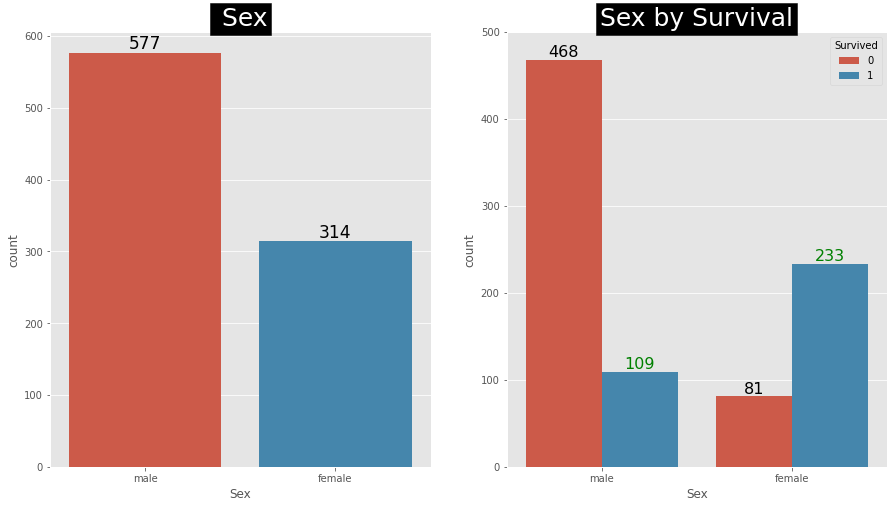

In [257]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
ax3=sns.countplot(data=train_dataset,x="Sex")
ax3.bar_label(ax3.containers[0],size=17)
plt.title(' Sex',fontfamily='Times New Roman',size=25,color='white',backgroundcolor='k')

plt.subplot(1,2,2)
ax4=sns.countplot(data=train_dataset,x="Sex",hue="Survived")
ax4.bar_label(ax4.containers[0],size=16), ax4.bar_label(ax4.containers[1],size=16,color='green')
plt.title('Sex by Survival',fontfamily='Times New Roman',size=25,color='white',backgroundcolor='k'),ax4.set_ylim(0,500)
plt.show()

Survived

In [258]:
labels=train_dataset['Survived'].value_counts().index
vals=train_dataset['Survived'].value_counts().values

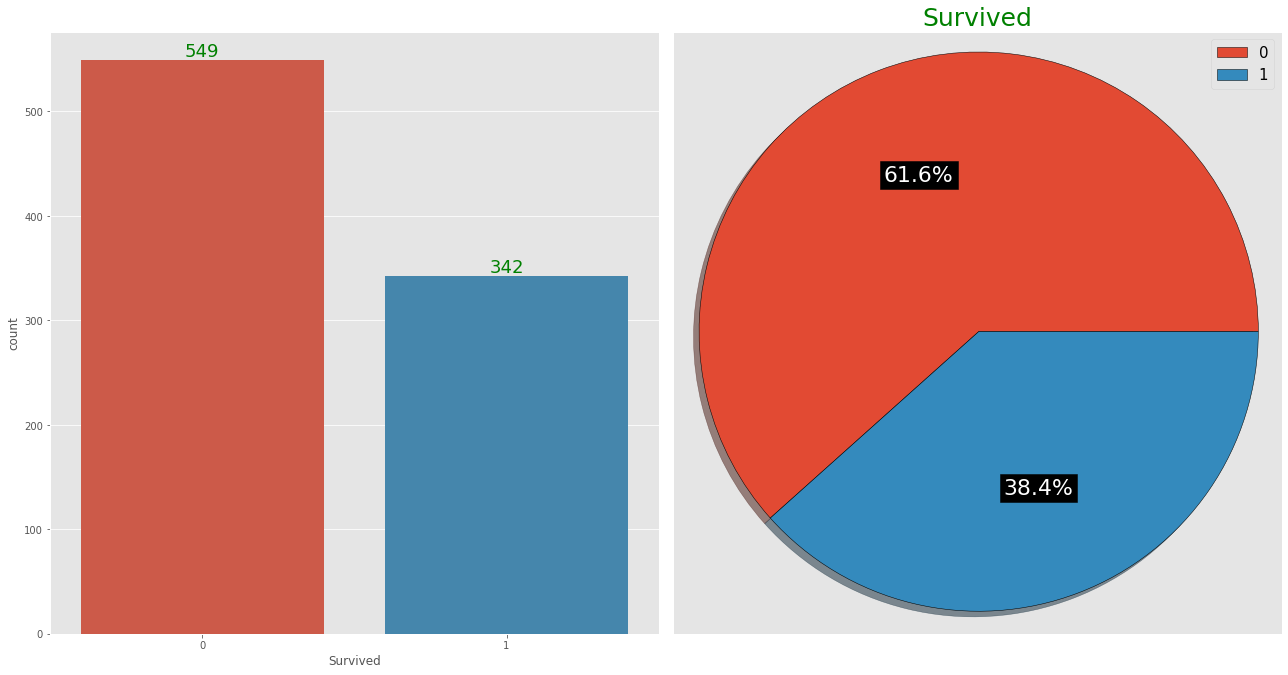

In [259]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
ax8=sns.countplot(data=train_dataset,x="Survived")
ax8.bar_label(ax8.containers[0],color='green',size=18)

plt.subplot(2,2,2)
plt.pie(vals,autopct='%1.1f%%',frame=True,shadow=True,wedgeprops={'edgecolor':'k'},
        textprops={'color':'white','size':22,'backgroundcolor':'black'})
plt.title('Survived',color='green',size=25),plt.axis('equal'),plt.xticks(()),plt.yticks(()),plt.legend(labels,loc=1,fontsize=15)


plt.tight_layout()
plt.show()

Pclass:   TICKET CLASS: (1:'1st', 2:'2nd', 3:'3rd')

In [260]:
train_dataset['Pclass'].value_counts()  #the number of occuranves of each ticket class among the passengers.

3    491
1    216
2    184
Name: Pclass, dtype: int64

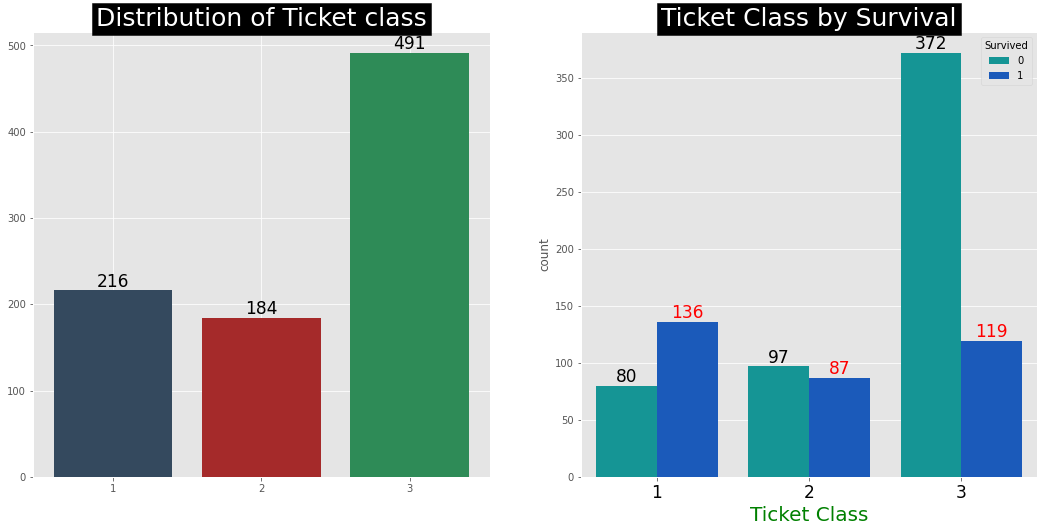

In [261]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
color=['seagreen','#34495E', 'brown']
ax5 = plt.bar(train_dataset['Pclass'].value_counts().index,train_dataset['Pclass'].value_counts().values,label='Pclass',color=color)
plt.bar_label(ax5,size=17,color='black'), plt.xticks([1,2,3])
plt.title('Distribution of Ticket class',fontfamily='Times New Roman',size=25,color='white',backgroundcolor='k')

plt.subplot(2,2,2)
ax6=sns.countplot(data=train_dataset,x='Pclass',hue='Survived',palette='winter_r')
ax6.bar_label(ax6.containers[0],size=17,color='k'),ax6.bar_label(ax6.containers[1],size=17,color='red')
plt.title('Ticket Class by Survival',fontfamily='Times New Roman',size=25,color='white',backgroundcolor='k')
plt.xticks(color='k',size=17), plt.xlabel('Ticket Class',color='green',size=20)
plt.show()

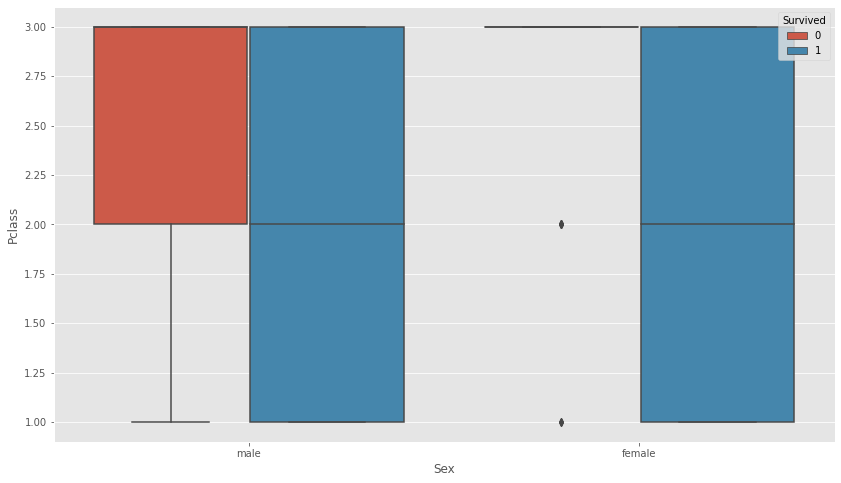

In [262]:
plt.figure(figsize=(14,8))
sns.boxplot(data=train_dataset,x='Sex',y='Pclass',hue='Survived')
plt.show()

Parch: Number of parents and children of the passenger aboard

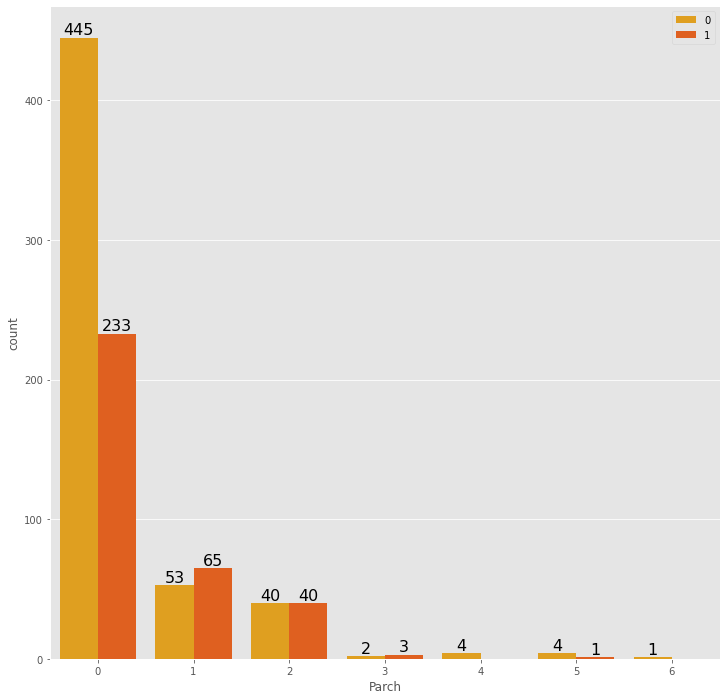

In [263]:
plt.figure(figsize=(12,12))
ax7=sns.countplot(data=train_dataset,x="Parch",hue='Survived',palette='autumn_r')
ax7.bar_label(ax7.containers[0],size=16), ax7.bar_label(ax7.containers[1],size=16), plt.legend(loc=1)
plt.show()

SibSp: Number of siblings and spouses of the passenger aboard

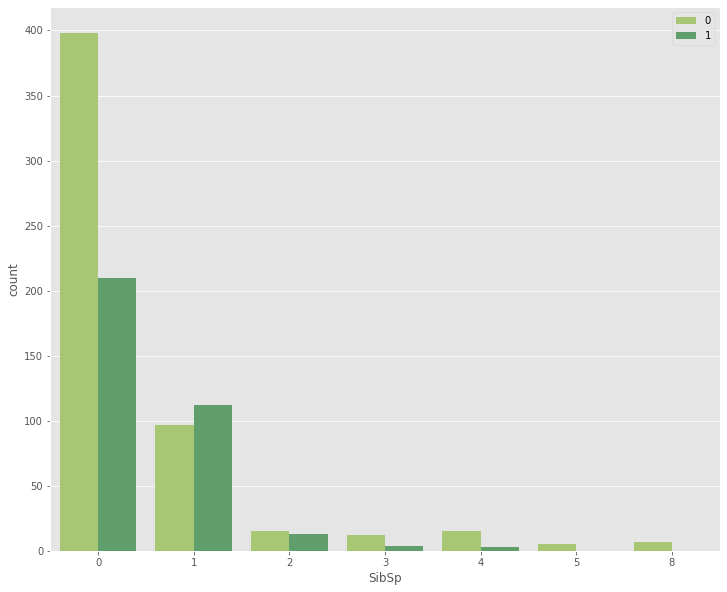

In [264]:
plt.figure(figsize=(12,10))
sns.countplot(data=train_dataset,x="SibSp",hue="Survived",palette='summer_r'), plt.legend(loc=1)
plt.show()

In [265]:
train_dataset.groupby('Survived').count()   #grouping the data by the target.

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size
Survived,,,,,,,,,
0,549,549,549,549,549,549,549,549,549
1,342,342,342,342,342,342,342,342,342


In [266]:
train_dataset.drop('Family_Size',axis=1,inplace=True)  #dropping the column created for analysis

# FEATURE ENGINEERING

Encoding the Sex column using get dummies.

In [267]:
Sex_encoded=pd.get_dummies(train_dataset['Sex'],prefix='Sex') #converting the object feature sex into numerical using pandas.get_dummies()

In [268]:
train_dataset=pd.concat([train_dataset,Sex_encoded],axis=1)   #concating the two dataframes together using the pandas.concat()
train_dataset.drop('Sex',inplace=True,axis=1)  #dropping the object featuire

In [269]:
train_dataset.head()   #displaying the first five rows of the dataset after encoding.

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
1,0,3,22.000,1,0,own,7.250,S,0,1
2,1,1,38.000,1,0,own,71.283,C,1,0
3,1,3,26.000,0,0,own,7.925,S,1,0
4,1,1,35.000,1,0,collective,53.100,S,1,0
5,0,3,35.000,0,0,own,8.050,S,0,1


Encoding the Embarked column

In [270]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer  #importing the libraries.
encoder=LabelEncoder() #using the sklearn labelEncoder to convert object datatype to numerical datatype
train_dataset['Embarked']=encoder.fit_transform(train_dataset['Embarked'])  

In [271]:
binarizer=LabelBinarizer()  #using the sklearn labelbinarizer to convert object datatype to numerical datatype
train_dataset['Ticket']=binarizer.fit_transform(train_dataset['Ticket'])

In [272]:
train_dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
1,0,3,22.000,1,0,1,7.250,2,0,1
2,1,1,38.000,1,0,1,71.283,0,1,0
3,1,3,26.000,0,0,1,7.925,2,1,0
4,1,1,35.000,1,0,0,53.100,2,1,0
5,0,3,35.000,0,0,1,8.050,2,0,1


In [273]:
test_data['Ticket']=binarizer.fit_transform(test_data['Ticket'])  #this converts the numerical datatype into onehot numericals

In [274]:
test_encoded=pd.get_dummies(test_data['Sex'],prefix='Sex')  #converting the sex dtatype into numerical datatype
test_data=pd.concat([test_data,test_encoded],axis=1)  #joining the two dataframes togerher by using the concat pf pandas.
test_data.drop('Sex',inplace=True,axis=1)  #dropping the object feature

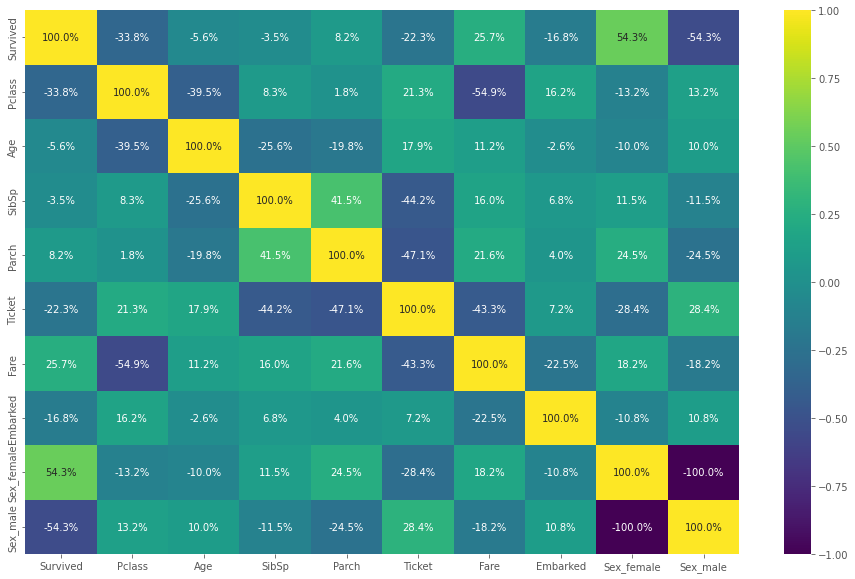

In [275]:
plt.figure(figsize=(16,10))
sns.heatmap(train_dataset.corr(),annot=True,fmt='0.1%',cmap='viridis')  #the correlation after the above steps, data cleaning and feature engineering.
plt.show()

<AxesSubplot:>

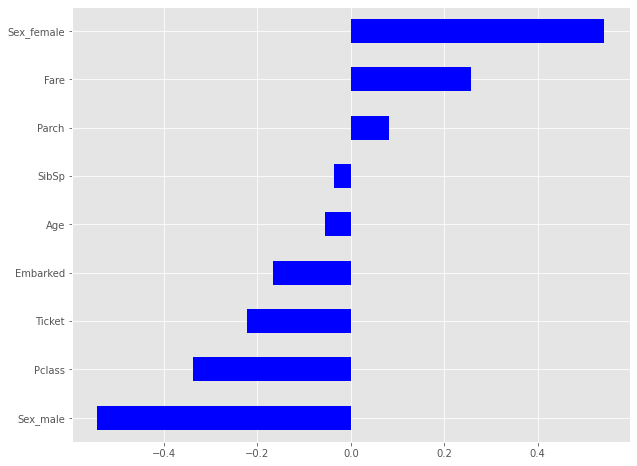

In [276]:
plt.figure(figsize=(10,8))
corr=train_dataset.corr().drop('Survived')
corr['Survived'].sort_values(ascending=True).plot.barh(color='blue')

SPLITTING THE DATASET

In [277]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, StratifiedKFold, cross_val_predict
X = train_dataset.drop('Survived',axis=1)  #this is a Matrix
y=train_dataset['Survived']   #this is a vector

In [278]:
X.columns   #the columns in the X dataframe

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked',
       'Sex_female', 'Sex_male'],
      dtype='object')

In [279]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)  #splitting the dataset

In [280]:
print("The shape of the training dataset is:\t",X_train.shape)   #the shape of the training dataset.
print("The shape of the test dataset is:\t",X_test.shape)   #shaoe of the testing dataset.

The shape of the training dataset is:	 (668, 9)
The shape of the test dataset is:	 (223, 9)


In [281]:
y.value_counts() #the data is imbalanced with 0 having majority values while y has minority thus minority class.

0    549
1    342
Name: Survived, dtype: int64

In [282]:
scaler=StandardScaler()   #initializing the method
X_train=scaler.fit_transform(X_train)  #NORMALIZING the data to a particular range/scale
X_test=scaler.transform(X_test)

# MODEL CREATION

In [283]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics

In [284]:
n_folds=StratifiedKFold(n_splits=10)  #Creating strata groups on the dataset.
def evaluation(model, X_train, y_train, X_test, y_test):   #creating a function called evaluation and passing the parameters as set above.
    y_predicted=model.predict(X_test)    #the miodel passed here predicts the output.
    print("The confusion matrix is:", metrics.confusion_matrix(y_test,y_predicted))   #the confusion matrix having FN,TN,FP and TP
    print("\n")
    print("The Classification report is:",metrics.classification_report(y_test, y_predicted))  #the classification report

# KNEARESTNEIGHBORSCLASSIFIER

In [285]:
knn_model=KNeighborsClassifier()   #initializing the Kneighbors classifier for classification
knn_model.fit(X_train,y_train)   #training the algorithm with the training dataset.

KNeighborsClassifier()

In [286]:
evaluation(knn_model,X_train,y_train,X_test,y_test)   #calling the fuction with the knn classifier model.

The confusion matrix is: [[119  15]
 [ 20  69]]


The Classification report is:               precision    recall  f1-score   support

           0       0.86      0.89      0.87       134
           1       0.82      0.78      0.80        89

    accuracy                           0.84       223
   macro avg       0.84      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223



In [287]:
cross_val_score(knn_model,X_train,y_train,cv=n_folds,scoring='accuracy').mean() #the training accuracy of the knn model

0.7934644957033017

In [288]:
cross_val_score(knn_model,X_train,y_train,cv=n_folds,scoring='precision').mean() #the training precision of the knn model

0.7584112680501855

Model Optimization

In [289]:
param_grid={'n_neighbors':np.arange(0,30),
           'weights':['uniform','distance'],
           'algorithm':['auto','ball_tree','kd_tree','brute'],
           'leaf_size':np.arange(0,11)}

#using gridsearchcv for finding the best parameters for the model to increase the accuracy of tyhe model.
knn_grid=GridSearchCV(knn_model,param_grid=param_grid,n_jobs=-1,cv=n_folds,scoring='accuracy')  

In [290]:
import time
%time knn_grid.fit(X_train,y_train) #fitting the new knn model with the training dataset and getting the time used to run

CPU times: user 23 s, sys: 401 ms, total: 23.4 s
Wall time: 1min 49s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [291]:
print("The best parameter is:\t",knn_grid.best_params_) #obtaining the best parameters based on the results of the GridSearchCV
print('\n')
print("The best estimator is:\t",knn_grid.best_estimator_) #obtaining the best ESTIMATOR based On the results of the GridSearchCV
print('\n')
print("The best score is:\t",knn_grid.best_score_) #obtaining the best score of the model based on the results of the GridSearchCV

The best parameter is:	 {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 13, 'weights': 'uniform'}


The best estimator is:	 KNeighborsClassifier(leaf_size=1, n_neighbors=13)


The best score is:	 0.8204884667571234


In [292]:
evaluation(knn_grid,X_train,y_train,X_test,y_test) #the evaluation after the gridsearchcv

The confusion matrix is: [[118  16]
 [ 26  63]]


The Classification report is:               precision    recall  f1-score   support

           0       0.82      0.88      0.85       134
           1       0.80      0.71      0.75        89

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



In [293]:
knn_grid_model=knn_grid.best_estimator_
knn_grid_model.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=13)

In [294]:
cross_val_score(knn_grid_model,X_train,y_train,cv=n_folds,scoring='accuracy').mean() #training accuracy after obtaining the best estimator and using it.

0.8204884667571234

In [295]:
cross_val_score(knn_grid_model,X_train,y_train,cv=n_folds,scoring='precision').mean()  #precision score after obtaining the best estimators

0.810693895476504

In [296]:
y_train_predict=knn_grid_model.predict(X_train)   #predicting the training dataset
knn_training_accuracy=cross_val_score(knn_grid_model,X_train,y_train,cv=n_folds,scoring='accuracy').mean() #training accuracy using cross-validation
knn_train_precision=metrics.precision_score(y_train,y_train_predict)  #precision scopre of the training dataset.

y_pred=knn_grid_model.predict(X_test)  #predicting a new dataset to validate the model efficiency.
knn_test_accuracy=metrics.accuracy_score(y_test,y_pred)   #getting the test accuracy of the model on the new dataset
knn_test_precision =metrics.precision_score(y_test,y_pred)  #getting the test precision score of the model on the new dataset

# DECISION TREE CLASSIFIER

In [297]:
decision_tree=tree.DecisionTreeClassifier(random_state=42)#initializing the decuision tree classifier for classification
decision_tree.fit(X_train,y_train) #training the algorithm with the training dataset.

DecisionTreeClassifier(random_state=42)

In [298]:
evaluation(decision_tree,X_train,y_train,X_test,y_test)   #calling the fuction with the decision tree classifier model.

The confusion matrix is: [[103  31]
 [ 28  61]]


The Classification report is:               precision    recall  f1-score   support

           0       0.79      0.77      0.78       134
           1       0.66      0.69      0.67        89

    accuracy                           0.74       223
   macro avg       0.72      0.73      0.73       223
weighted avg       0.74      0.74      0.74       223



In [299]:
cross_val_score(decision_tree,X_train,y_train, cv=n_folds,n_jobs=-1,scoring='accuracy').mean()
 #the training accuracy of the model before obtaining the best parameters

0.7618950701040254

In [300]:
cross_val_score(decision_tree,X_train,y_train,cv=n_folds,scoring='precision').mean()
#the training precision of the model before obtaining the best parameters

0.686043513957307

Hyperparameter Tuning the Decision Tree

In [301]:
param_grid={
    'criterion': ['entropy','gini'],  #the splitting of the tree
    'max_depth': [np.arange(1,21,1),None],  #the maximum depth of the tree
    'max_features': ['auto','sqrt','log2', None], #features to use to split the tree
    'max_leaf_nodes':np.arange(1,31)}    #the leaf nodes
tree_grid=GridSearchCV(decision_tree,param_grid=param_grid,cv=n_folds,scoring='accuracy',n_jobs=-1) 

In [302]:
%time tree_grid.fit(X_train,y_train)

CPU times: user 4.02 s, sys: 42.7 ms, total: 4.06 s
Wall time: 8.79 s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                       None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'max_leaf_nodes': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='accuracy')

In [303]:
print("The best parameter is:\t",tree_grid.best_params_) #obtaining the best parameters based on the results of the GridSearchCV
print('\n')
print("The best estimator is:\t",tree_grid.best_estimator_) #obtaining the best estimator based on the results of the GridSearchCV
print('\n')
print("The best score is:\t",tree_grid.best_score_) #obtaining the best score based on the results of the GridSearchCV

The best parameter is:	 {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 30}


The best estimator is:	 DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=30, random_state=42)


The best score is:	 0.8294210764360017


In [304]:
decision_grid_model=tree_grid.best_estimator_
decision_grid_model.fit(X_train,y_train)  #fitting the best estimator with the training dataset

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=30, random_state=42)

In [305]:
cross_val_score(decision_grid_model,X_train,y_train,cv=n_folds,scoring='accuracy').mean() #training accuracy after obtaining the best estimator and using it.

0.8294210764360017

In [306]:
cross_val_score(decision_grid_model,X_train,y_train,cv=n_folds,scoring='precision').mean()
#precision score using the best parameters of the decision tree

0.8355886322140191

In [307]:
y_train_pred=decision_grid_model.predict(X_train) #predicting the training dataset
decision_train_accuracy=metrics.accuracy_score(y_train,y_train_pred)
decision_train_precision=metrics.precision_score(y_train,y_train_pred) #precision score of the training dataset.

y_pred=decision_grid_model.predict(X_test)  #using the model to predict a new dataset and validating the model
decision_test_accuracy=metrics.accuracy_score(y_test,y_pred)  #calculating the model accuracy after validating it
decision_test_precision=metrics.precision_score(y_test, y_pred) #calculating the model precision after validating it


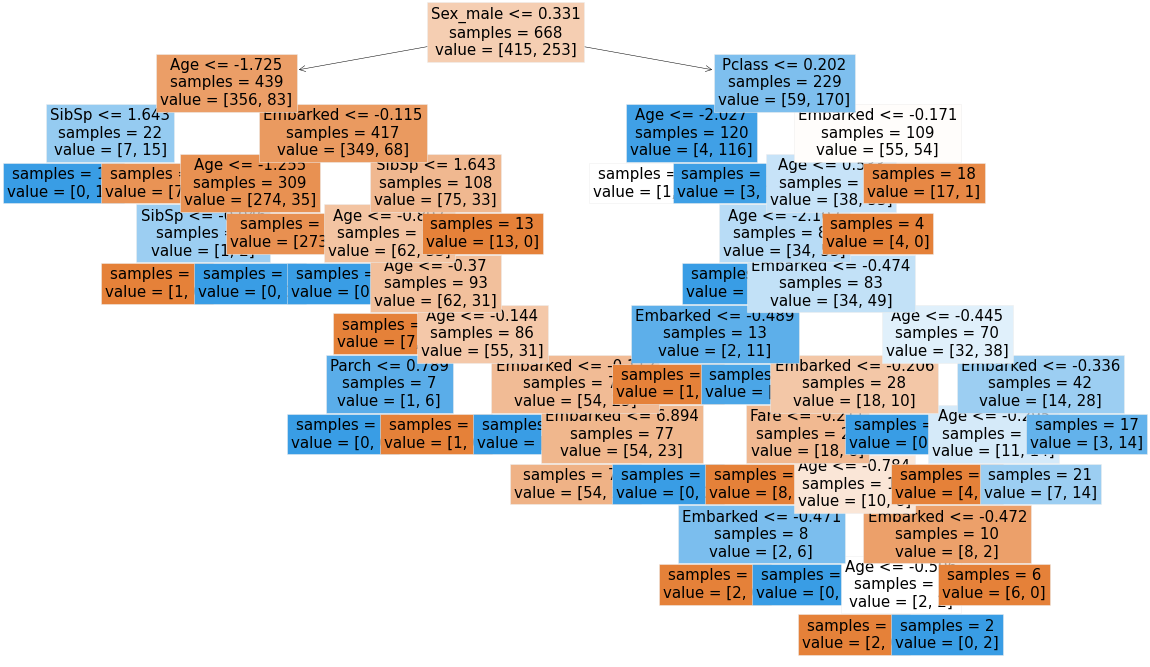

In [308]:
#visualizing the Decision Tree model
plt.figure(figsize=(20,12))
features_names=['Pclass','Age','SibSp','Parch','Fare','Embarked','Sex_female','Sex_male']
tree.plot_tree(decision_grid_model,filled=True,fontsize=15,feature_names=features_names,impurity=False)
plt.show()

# RANDOM FOREST CLASSIFIER

In [309]:
forest_clf=RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [310]:
evaluation(forest_clf, X_train, y_train, X_test, y_test)

The confusion matrix is: [[112  22]
 [ 21  68]]


The Classification report is:               precision    recall  f1-score   support

           0       0.84      0.84      0.84       134
           1       0.76      0.76      0.76        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



In [311]:
cross_val_score(forest_clf,X_train,y_train, cv=n_folds,scoring='accuracy').mean()

0.805495251017639

In [312]:
cross_val_score(forest_clf,X_train,y_train, cv=n_folds,scoring='precision').mean()

0.7606147938083423

In [313]:
param_grid={
    'n_estimators':np.arange(10,70,10),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(1,8,1), 
    'max_features':np.arange(0,5),
    'max_leaf_nodes':np.arange(1,7,1)}
forest_grid=GridSearchCV(forest_clf,param_grid=param_grid,cv=5,scoring='accuracy',verbose=1)

In [314]:
%time forest_grid.fit(X_train,y_train)

Fitting 5 folds for each of 2520 candidates, totalling 12600 fits
CPU times: user 9min 55s, sys: 5.15 s, total: 10min
Wall time: 10min


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7]),
                         'max_features': array([0, 1, 2, 3, 4]),
                         'max_leaf_nodes': array([1, 2, 3, 4, 5, 6]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60])},
             scoring='accuracy', verbose=1)

In [315]:
print("The best parameter is:\t",forest_grid.best_params_)
print('\n')
print("The best estimator is:\t",forest_grid.best_estimator_)
print('\n')
print("The best score is:\t",forest_grid.best_score_)

The best parameter is:	 {'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'max_leaf_nodes': 6, 'n_estimators': 10}


The best estimator is:	 RandomForestClassifier(max_depth=3, max_features=4, max_leaf_nodes=6,
                       n_estimators=10, random_state=42)


The best score is:	 0.8218493996184492


In [316]:
forest_grid_model=forest_grid.best_estimator_
forest_grid_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=4, max_leaf_nodes=6,
                       n_estimators=10, random_state=42)

In [317]:
evaluation(forest_grid_model, X_train, y_train, X_test, y_test)

The confusion matrix is: [[118  16]
 [ 26  63]]


The Classification report is:               precision    recall  f1-score   support

           0       0.82      0.88      0.85       134
           1       0.80      0.71      0.75        89

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



In [318]:
cross_val_score(forest_grid_model, X_train, y_train, cv=n_folds, scoring='accuracy').mean()

0.8099502487562189

In [319]:
cross_val_score(forest_grid_model, X_train, y_train, cv=n_folds, scoring='precision').mean()

0.8000781573498964

In [320]:
y_train_pred=forest_grid_model.predict(X_train)
forest_train_accuracy=metrics.accuracy_score(y_train,y_train_pred)
forest_train_precision=metrics.precision_score(y_train,y_train_pred) #training precision accuracy using cross-validation

y_pred=forest_grid_model.predict(X_test)
forest_test_accuracy=metrics.accuracy_score(y_test,y_pred)
forest_test_precision=metrics.precision_score(y_test, y_pred) 

# GradientBoostingClassifier

In [321]:
gradient_clf=GradientBoostingClassifier(random_state=42)
gradient_clf.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [322]:
evaluation(gradient_clf, X_train, y_train, X_test, y_test)

The confusion matrix is: [[121  13]
 [ 26  63]]


The Classification report is:               precision    recall  f1-score   support

           0       0.82      0.90      0.86       134
           1       0.83      0.71      0.76        89

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.81       223
weighted avg       0.83      0.83      0.82       223



In [323]:
cross_val_score(gradient_clf,X_train,y_train, cv=n_folds,scoring='accuracy').mean() #the training accuracy of the model

0.8174581637268205

In [324]:
cross_val_score(gradient_clf,X_train,y_train, cv=n_folds,scoring='precision').mean() #the precision accuracy of the model

0.8062038343294231

Model Hypertuning

In [325]:
param_grid={'n_estimators':np.arange(10,160,10),
            'max_depth':np.arange(1,11,1),
            'max_features':np.arange(1,9),
            'subsample':np.arange(0.1,1),
            'learning_rate':np.arange(0.01,1)}
gradient_grid=GridSearchCV(gradient_clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

In [326]:
%time gradient_grid.fit(X_train,y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits
CPU times: user 45.4 s, sys: 1.98 s, total: 47.4 s
Wall time: 19min 58s


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.01]),
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': array([1, 2, 3, 4, 5, 6, 7, 8]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150]),
                         'subsample': array([0.1])},
             scoring='accuracy', verbose=1)

In [327]:
print("The best parameter is:\t",gradient_grid.best_params_)
print('\n')
print("The best estimator is:\t",gradient_grid.best_estimator_)
print('\n')
print("The best score is:\t",gradient_grid.best_score_)

The best parameter is:	 {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 8, 'n_estimators': 130, 'subsample': 0.1}


The best estimator is:	 GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features=8,
                           n_estimators=130, random_state=42, subsample=0.1)


The best score is:	 0.8384215287200363


In [328]:
gradient_grid_model=gradient_grid.best_estimator_
gradient_grid_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features=8,
                           n_estimators=130, random_state=42, subsample=0.1)

In [329]:
evaluation(gradient_grid_model, X_train, y_train, X_test, y_test)

The confusion matrix is: [[122  12]
 [ 28  61]]


The Classification report is:               precision    recall  f1-score   support

           0       0.81      0.91      0.86       134
           1       0.84      0.69      0.75        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



In [330]:
cross_val_score(gradient_grid_model, X_train, y_train, cv=n_folds, scoring='accuracy').mean()

0.8384215287200363

In [331]:
cross_val_score(gradient_grid_model, X_train, y_train, cv=n_folds, scoring='precision').mean()

0.8685566448801744

In [332]:
y_train_pred=gradient_grid_model.predict(X_train)
gradient_train_accuracy=metrics.accuracy_score(y_train,y_train_pred)
gradient_train_precision=metrics.precision_score(y_train,y_train_pred) #training precision accuracy using cross-validation

y_pred=forest_grid_model.predict(X_test)
gradient_test_accuracy=metrics.accuracy_score(y_test,y_pred)
gradient_test_precision=metrics.precision_score(y_test, y_pred) 

# XGBoost Classifier

In [333]:
from xgboost import XGBClassifier
xgb_clf=XGBClassifier(eval_metric='logloss',random_state=42)

In [334]:
xgb_clf.fit(X_train,y_train)    #training the model with training dataset.

XGBClassifier(eval_metric='logloss', random_state=42)

In [335]:
evaluation(xgb_clf,X_train,y_train,X_test,y_test)

The confusion matrix is: [[119  15]
 [ 25  64]]


The Classification report is:               precision    recall  f1-score   support

           0       0.83      0.89      0.86       134
           1       0.81      0.72      0.76        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



In [336]:
cross_val_score(xgb_clf,X_train,y_train, cv=n_folds,scoring='accuracy').mean() #the training accuracy of the model

0.830958842152872

In [337]:
cross_val_score(xgb_clf,X_train,y_train, cv=n_folds,scoring='precision').mean()

0.8423520923520924

Model Hypertuning

In [338]:
param_grid={
    'booster':['gbtree','gblinear','dart'],
    'validate_parameters':[True,False],
    'eta':np.arange(0,1),
    'max_depth':np.arange(0,10,1)}
xgb_grid=GridSearchCV(xgb_clf,param_grid=param_grid,scoring='accuracy',cv=n_folds,verbose=1)

In [339]:
xgb_grid.fit(X_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=XGBClassifier(eval_metric='logloss', random_state=42),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'eta': array([0]),
                         'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'validate_parameters': [True, False]},
             scoring='accuracy', verbose=1)

In [340]:
print("The best parameter is:\t",xgb_grid.best_params_)
print('\n')
print("The best estimator is:\t",xgb_grid.best_estimator_)
print('\n')
print("The best score is:\t",xgb_grid.best_score_)

The best parameter is:	 {'booster': 'gbtree', 'eta': 0, 'max_depth': 3, 'validate_parameters': True}


The best estimator is:	 XGBClassifier(eta=0, eval_metric='logloss', random_state=42,
              validate_parameters=True)


The best score is:	 0.830958842152872


In [341]:
xgb_grid_model=xgb_grid.best_estimator_
xgb_grid_model.fit(X_train,y_train)

XGBClassifier(eta=0, eval_metric='logloss', random_state=42,
              validate_parameters=True)

In [342]:
evaluation(xgb_grid_model, X_train, y_train, X_test, y_test)

The confusion matrix is: [[119  15]
 [ 25  64]]


The Classification report is:               precision    recall  f1-score   support

           0       0.83      0.89      0.86       134
           1       0.81      0.72      0.76        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



In [343]:
cross_val_score(xgb_grid_model, X_train, y_train, cv=n_folds, scoring='accuracy').mean() 
# accuracy of the optimized model

0.830958842152872

In [344]:
cross_val_score(xgb_grid_model, X_train, y_train, cv=n_folds, scoring='precision').mean()

0.8423520923520924

In [345]:
y_train_pred=xgb_grid_model.predict(X_train)
xgb_train_accuracy=metrics.accuracy_score(y_train,y_train_pred)
xgb_train_precision=metrics.precision_score(y_train,y_train_pred) #training precision accuracy using cross-validation

y_pred=xgb_grid_model.predict(X_test)
xgb_test_accuracy=metrics.accuracy_score(y_test,y_pred)
xgb_test_precision=metrics.precision_score(y_test, y_pred) 

# **model comparison**

In [346]:
models=pd.DataFrame({
    'models':['KNeighborsClassifiers','DecisionTree','RandomForest','GradientBoost','Xgboost'],
    'Training_Accuracy':[knn_training_accuracy,decision_train_accuracy,forest_train_accuracy,gradient_train_accuracy,xgb_train_accuracy],
    'Testing Accuracy':[knn_test_accuracy,decision_test_accuracy,forest_test_accuracy,gradient_test_accuracy,xgb_test_accuracy],
    'Training Precision Score':[knn_train_precision,decision_train_precision,forest_train_precision,gradient_train_precision,xgb_train_precision],
    'Testing Precision Score':[knn_test_precision,decision_test_precision,forest_test_precision,gradient_test_precision,xgb_test_precision]})
#the above creates a dataframe of the metrics of the machine learning models.

In [347]:
models.set_index('models',inplace=True)   #setting the model name to be index and dropping the index name.
models.index.name=None

In [348]:
models   #displaying the dataframe

,Training_Accuracy,Testing Accuracy,Training Precision Score,Testing Precision Score
KNeighborsClassifiers,0.820,0.812,0.814,0.797
DecisionTree,0.894,0.807,0.933,0.838
RandomForest,0.828,0.812,0.808,0.797
GradientBoost,0.864,0.812,0.918,0.797
Xgboost,0.892,0.821,0.929,0.810


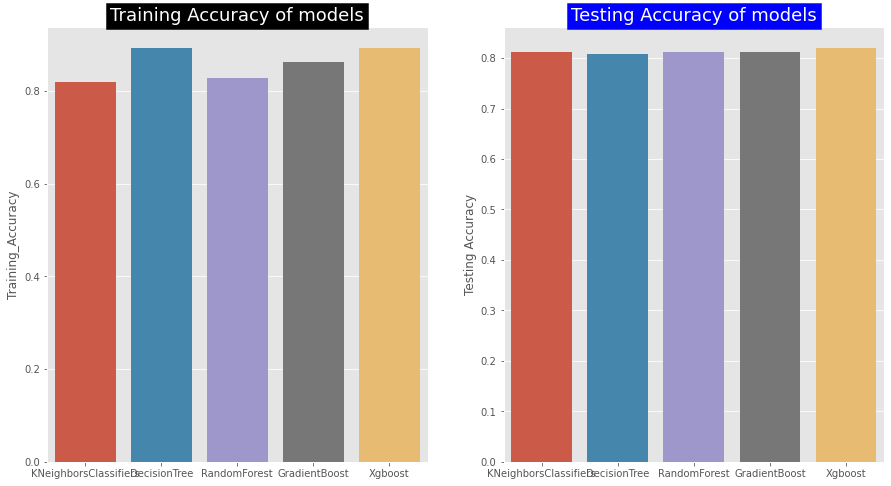

In [349]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
fig2=sns.barplot(data=models,x=models.index,y=models['Training_Accuracy'])
plt.title("Training Accuracy of models",size=18,color='white',backgroundcolor='black')

plt.subplot(1,2,2)
fig3=sns.barplot(data=models,x=models.index,y=models['Testing Accuracy'])
plt.title("Testing Accuracy of models",size=18,color='white',backgroundcolor='blue')
plt.show()   #vuisualizing the training and testing accuracy of the models

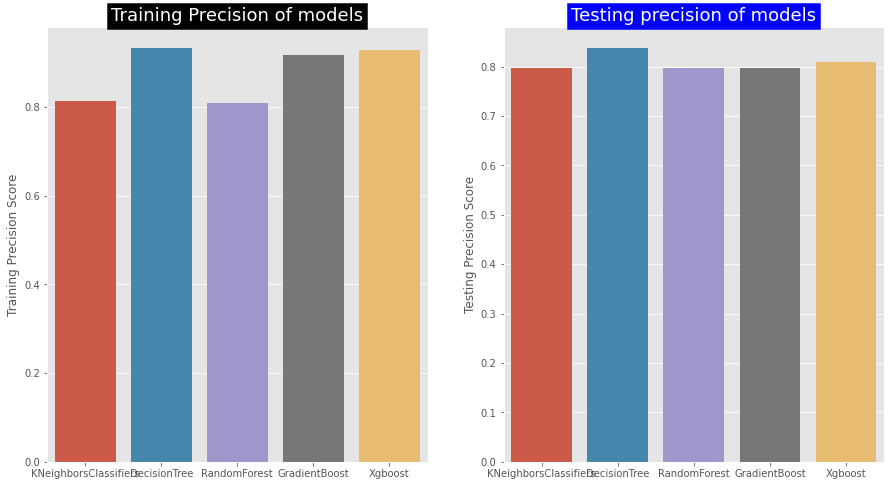

In [350]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
fig2=sns.barplot(data=models,x=models.index,y=models['Training Precision Score'])
plt.title("Training Precision of models",size=18,color='white',backgroundcolor='black')

plt.subplot(1,2,2)
fig3=sns.barplot(data=models,x=models.index,y=models['Testing Precision Score'])
plt.title("Testing precision of models",size=18,color='white',backgroundcolor='blue')
plt.show()  #vuisualizing the training and testing precision scores of the models

In [351]:
"""The XGBOOST CLASSIFIER WAS SELECTED AS IT HAS HIGH ACCURACY"""

'The XGBOOST CLASSIFIER WAS SELECTED AS IT HAS HIGH ACCURACY'

# PREDICTING THE TEST DATA

In [352]:
test_data.drop(['Name','Cabin'],axis=1,inplace=True)   #dropping the following columns dataset

In [353]:
encoder=LabelEncoder()
test_data['Embarked']=encoder.fit_transform(test_data['Embarked'])   #convering embarked object datatype into numerical datatype

In [354]:
final_model=xgb_grid_model.fit(X,y)  #training the model with the training dataset.

In [355]:
predictions=final_model.predict(test_data)  #predicting the test_data by using xgboost algorithm.

In [356]:
predictions #the predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [357]:
our_submission=pd.DataFrame({'PassengerId': test_data.index, 'Survived': predictions})
#creating a dataframe for our predictions and their correspondinmg ids or index

In [358]:
our_submission #the dataframe 

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [359]:
our_submission.to_csv('our_submission.csv', index=False)   #writing the results to a csv file and exporting them.